# 0. Variable

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import pickle
import sys
sys.path.append('./utils/qsar')
from Data_integration import Data_Integration
from Data_preprocess import Data_preprocess
from Rescale import rescale
from Feature_selection import feature_selection_pipeline
from Feature_engineering import feature_engineering
from Model_selection import model_selection
from Meta_analysis import statistic_data, statistic_test
from Posthoc import statical_test

from utils.vaeutils import *
seed_everything(42)

In [2]:
RUN = 'VEGFR2'
fps = 'RDK7'
data_path = './raw_data_features/'+RUN+'/'+fps+'.csv'
SAVE_FITTED_PIPELINE = './raw_data_features/'+RUN+'/pipeline/'
activity_col = 'pIC50'
smiles_col='rdkit_SMILES'
task_type = 'R'
var_thresh = 0.05
scoring = 'r2'

if not os.path.exists(SAVE_FITTED_PIPELINE):
    os.makedirs(SAVE_FITTED_PIPELINE)

data = pd.read_csv(data_path)
# data.drop(['Canomicalsmiles'], axis =1, inplace = True)
data.head()

,rdkit_SMILES,pIC50,0,1,2,3,4,5,6,7,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,CNC(=O)c1c(C)oc2cc(Oc3ccnc4cc(C(=O)N5CCC(OC)C5...,9.853872,0,1,0,0,0,1,1,0,...,0,1,0,1,1,0,0,0,0,1
1,CNC(=O)Nc1ccc(Oc2ncnc3cc(OCCCN4CCCCC4)c(OC)cc2...,9.698970,0,0,0,0,0,1,0,0,...,1,1,0,1,0,0,0,0,0,0
2,CNC(=O)c1c(C)sc2cc(Oc3ccnc4cc(-c5nccn5C)sc34)c...,9.677781,1,1,0,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
3,Cc1c(C(=O)NC2CC2)c2ccc(Oc3ccnc4cc(-c5nccn5C)sc...,9.663540,0,1,0,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
4,O=C1Nc2ccccc2C1=CNc1ccc(OCCCCN2CCOCC2)cc1,9.619789,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# **1. Data Itergration**

Train: 86.27%
Test: 13.73%
Train/Test: 6.28
Number of overlapping scaffolds: 0
Data train: (4115, 4098)
Data test: (655, 4098)
***************************************************************************


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


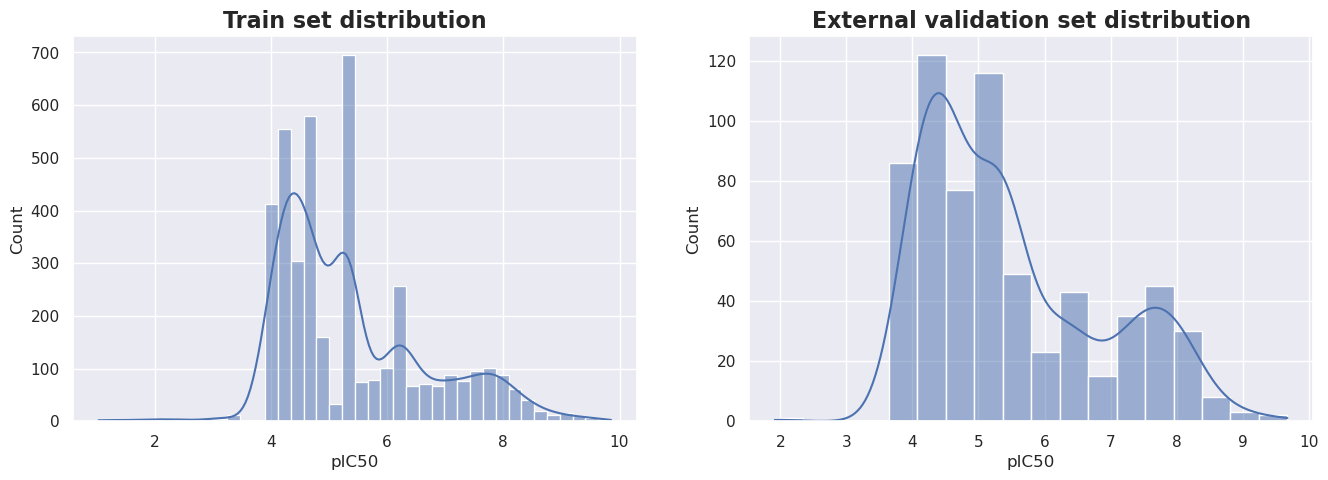

In [3]:
integration = Data_Integration(data, activity_col = activity_col, task_type= task_type,  smiles_col=smiles_col,
                              SAVE_PREFIX=f"{SAVE_FITTED_PIPELINE}/{fps}")
integration.fit()
Data_train = integration.data_train
Data_test = integration.data_test

# **2. Data Preprocessing**

Total duplicated rows-train: 5
Data train before drop duplicates: 4115
Data train after drop duplicates: 4110
***************************************************************************
Total duplicated rows-test: 0
Data test before drop duplicates: 655
Data test after drop duplicates: 655
***************************************************************************
Index(['1784', '2209', '2342', '2890', '3074', '3108'], dtype='object')
Total similar columns: 6
Data train before drop duplicates: (4110, 4098)
Data after drop duplicates: (4110, 4092)
***************************************************************************
Data test before drop duplicates: (655, 4098)
Data test after drop duplicates: (655, 4092)
***************************************************************************
Empty DataFrame
Columns: [ColumnName, TotalMissingVals, PercentMissing]
Index: []
Drop_cols []
Total missing value-train 0
Total missing value-test 0


,pIC50,rdkit_SMILES,0,1,2,3,4,5,6,7,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095


Total row-train with missing value 0


,pIC50,rdkit_SMILES,0,1,2,3,4,5,6,7,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095


Total row-test with missing value 0
(4110, 4090) (4110,)
>Threshold=0.00, Features=4089
>Threshold=0.05, Features=4011
>Threshold=0.10, Features=3589
>Threshold=0.15, Features=2845
>Threshold=0.20, Features=1783


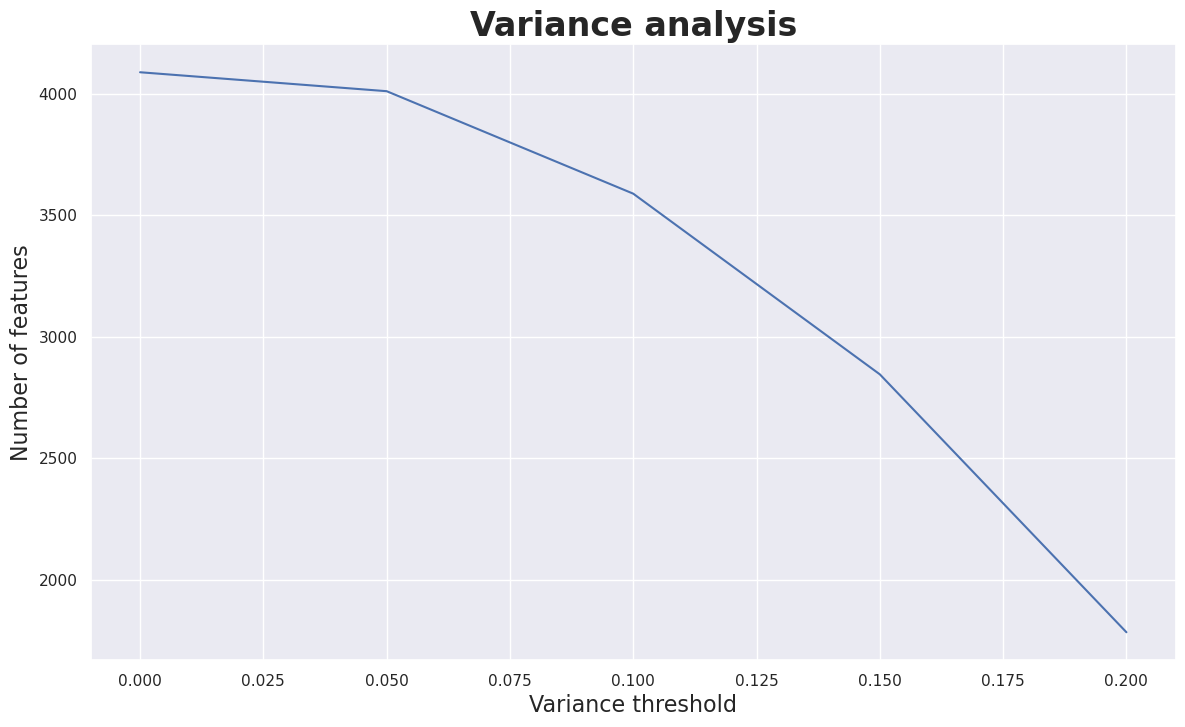

***************************************************************************


,pIC50,rdkit_SMILES,0,1,2,3,4,5,6,7,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,9.853872,CNC(=O)c1c(C)oc2cc(Oc3ccnc4cc(C(=O)N5CCC(OC)C5...,0,1,0,0,0,1,1,0,...,0,1,0,1,1,0,0,0,0,1
1,9.698970,CNC(=O)Nc1ccc(Oc2ncnc3cc(OCCCN4CCCCC4)c(OC)cc2...,0,0,0,0,0,1,0,0,...,1,1,0,1,0,0,0,0,0,0
2,9.663540,Cc1c(C(=O)NC2CC2)c2ccc(Oc3ccnc4cc(-c5nccn5C)sc...,0,1,0,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
3,9.619789,O=C1Nc2ccccc2C1=CNc1ccc(OCCCCN2CCOCC2)cc1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.619789,O=C1Nc2ccccc2C1=CNc1ccc(OCCCCN2CCCCC2)cc1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


(4110, 4013)
(655, 4013)


In [4]:
from Data_preprocess import Data_preprocess
preprocess = Data_preprocess(Data_train, Data_test, var_thresh = var_thresh, smiles_col=smiles_col,
                                     activity_col = activity_col,
                                     impute_params = {'impute': True, 'impute_method': 'KNNImputer', 'KNN_neighbors': 5})
preprocess.fit()
Data_train = preprocess.data_train
Data_test = preprocess.data_test
print(Data_train.shape)
print(Data_test.shape)

In [5]:
preprocess.save_pipeline(SAVE_FITTED_PIPELINE)

# 3. Rescale

In [6]:
rescaling = rescale(Data_train,Data_test, smiles_col=smiles_col,
                            activity_col=activity_col, scale_x = 'MinMaxScaler', scale_y = 'MinMaxScaler')
rescaling.fit()
Data_train = rescaling.data_train
Data_test = rescaling.data_test
scale_y = rescaling.scale_y

***************************************************************************
Scaling method for Y: MinMaxScaler


In [7]:
rescaling.save_pipeline(SAVE_FITTED_PIPELINE)

# **4. Feature Selection**

## 4.1. R2

Using Transformed Target Regressor
>Anova 0.667 ± 0.098 (0.660)
>Mutual_info 0.682 ± 0.103 (0.703)
>Random Forest 0.747 ± 0.085 (0.763)
>Extra Tree 0.683 ± 0.117 (0.710)
>AdaBoost 0.722 ± 0.094 (0.756)
>GradBoost 0.741 ± 0.088 (0.754)
>XGBoost 0.734 ± 0.091 (0.752)


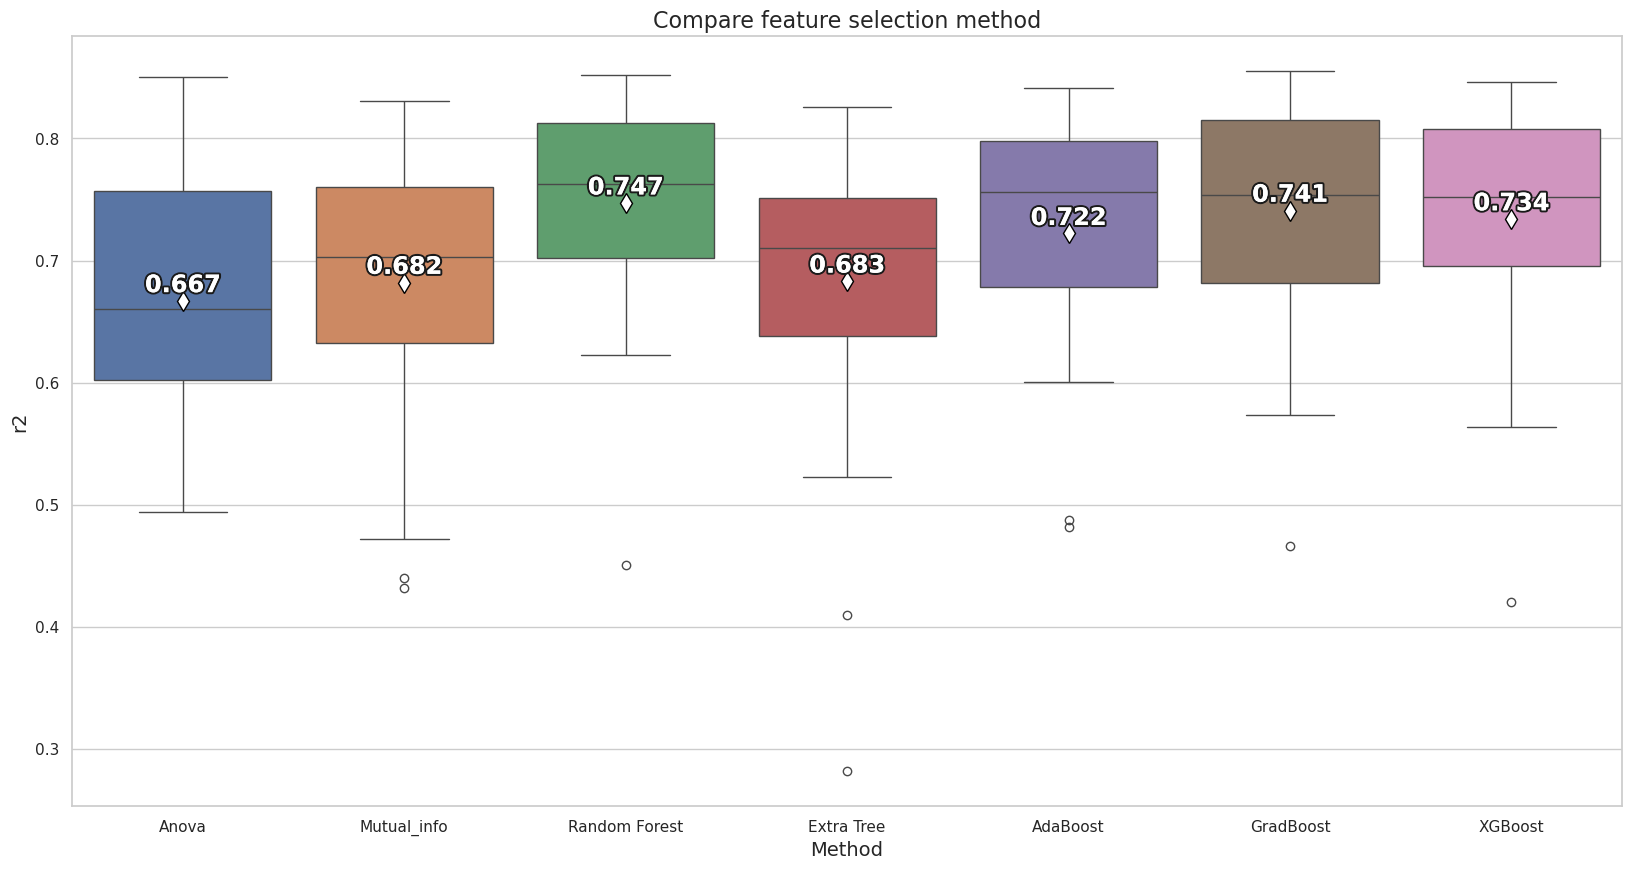

In [8]:
import warnings
warnings.filterwarnings('ignore')
scoring = 'r2'
Descriptor_select = feature_engineering(Data_train, Data_test, activity_col= activity_col, scoring=scoring, smiles_col=smiles_col,
                                       scale_y=scale_y)
Descriptor_select.case_model()
Descriptor_select.compare()

,model_1,model_2,t_stat,p_val,worse_prob,better_prob,rope_prob
0,Anova,Mutual_info,-0.311,1.000,0.540,0.303,0.156
1,Anova,Random Forest,-2.031,0.541,0.957,0.015,0.028
2,Anova,Extra Tree,-0.310,1.000,0.549,0.312,0.139
3,Anova,AdaBoost,-1.467,1.000,0.881,0.047,0.072
4,Anova,GradBoost,-1.921,0.678,0.946,0.019,0.035
5,Anova,XGBoost,-1.645,1.000,0.914,0.035,0.051
6,Mutual_info,Random Forest,-1.410,1.000,0.879,0.057,0.064
7,Mutual_info,Extra Tree,-0.039,1.000,0.434,0.404,0.161
8,Mutual_info,AdaBoost,-0.884,1.000,0.745,0.140,0.114
9,Mutual_info,GradBoost,-1.320,1.000,0.859,0.067,0.074


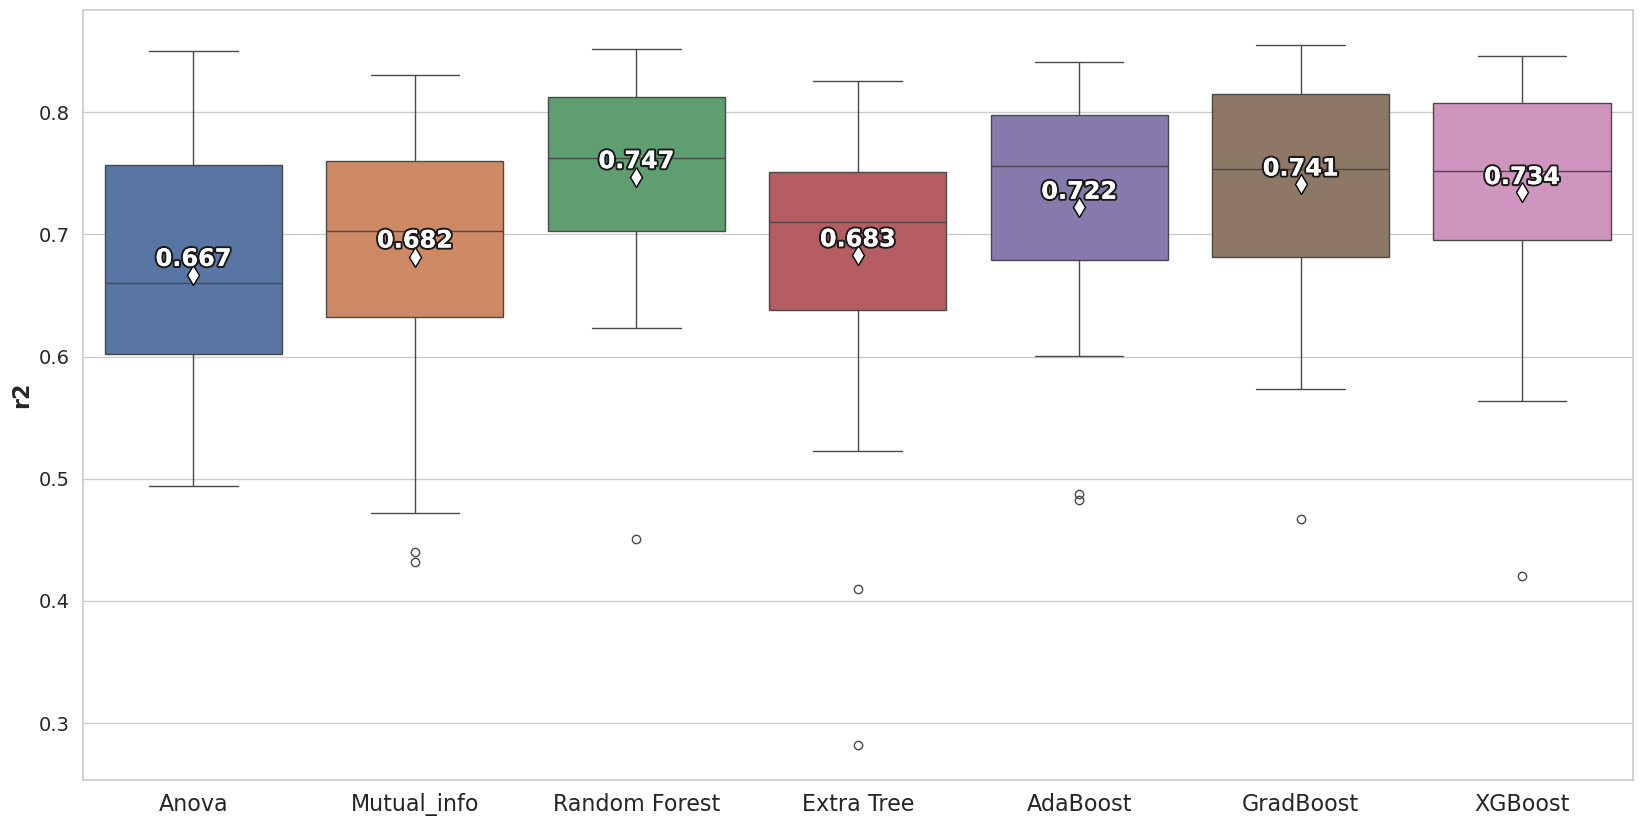

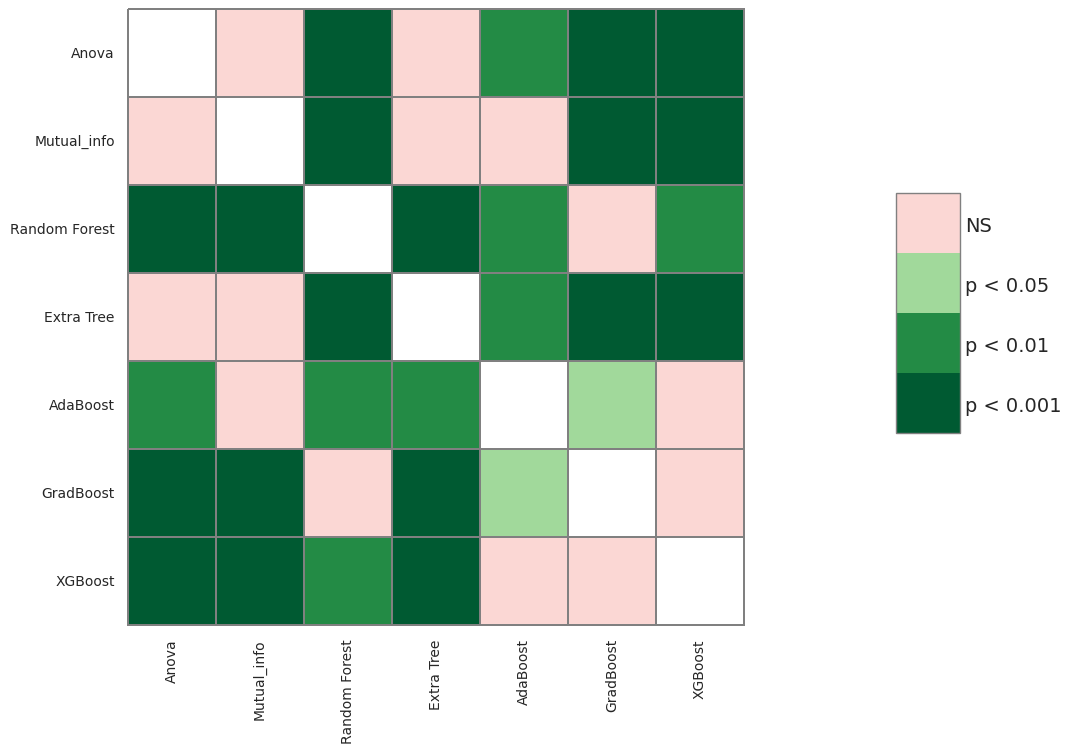

In [9]:
SAVE_PREFIX = './raw_data_features/'+RUN+'/feature_engineering/'+scoring+'/'
features_compare = statical_test(Descriptor_select.results,Descriptor_select.names, SAVE_PREFIX = SAVE_PREFIX, scoring=scoring,
                                 X_train = Descriptor_select.X_train,y_train = Descriptor_select.y_train)
features_compare.visualize()

## 4.2 RMSE

Using Transformed Target Regressor
>Anova -0.725 ± 0.144 (-0.743)
>Mutual_info -0.708 ± 0.139 (-0.696)
>Random Forest -0.629 ± 0.107 (-0.612)
>Extra Tree -0.701 ± 0.129 (-0.687)
>AdaBoost -0.658 ± 0.125 (-0.633)
>GradBoost -0.636 ± 0.117 (-0.632)
>XGBoost -0.644 ± 0.115 (-0.628)


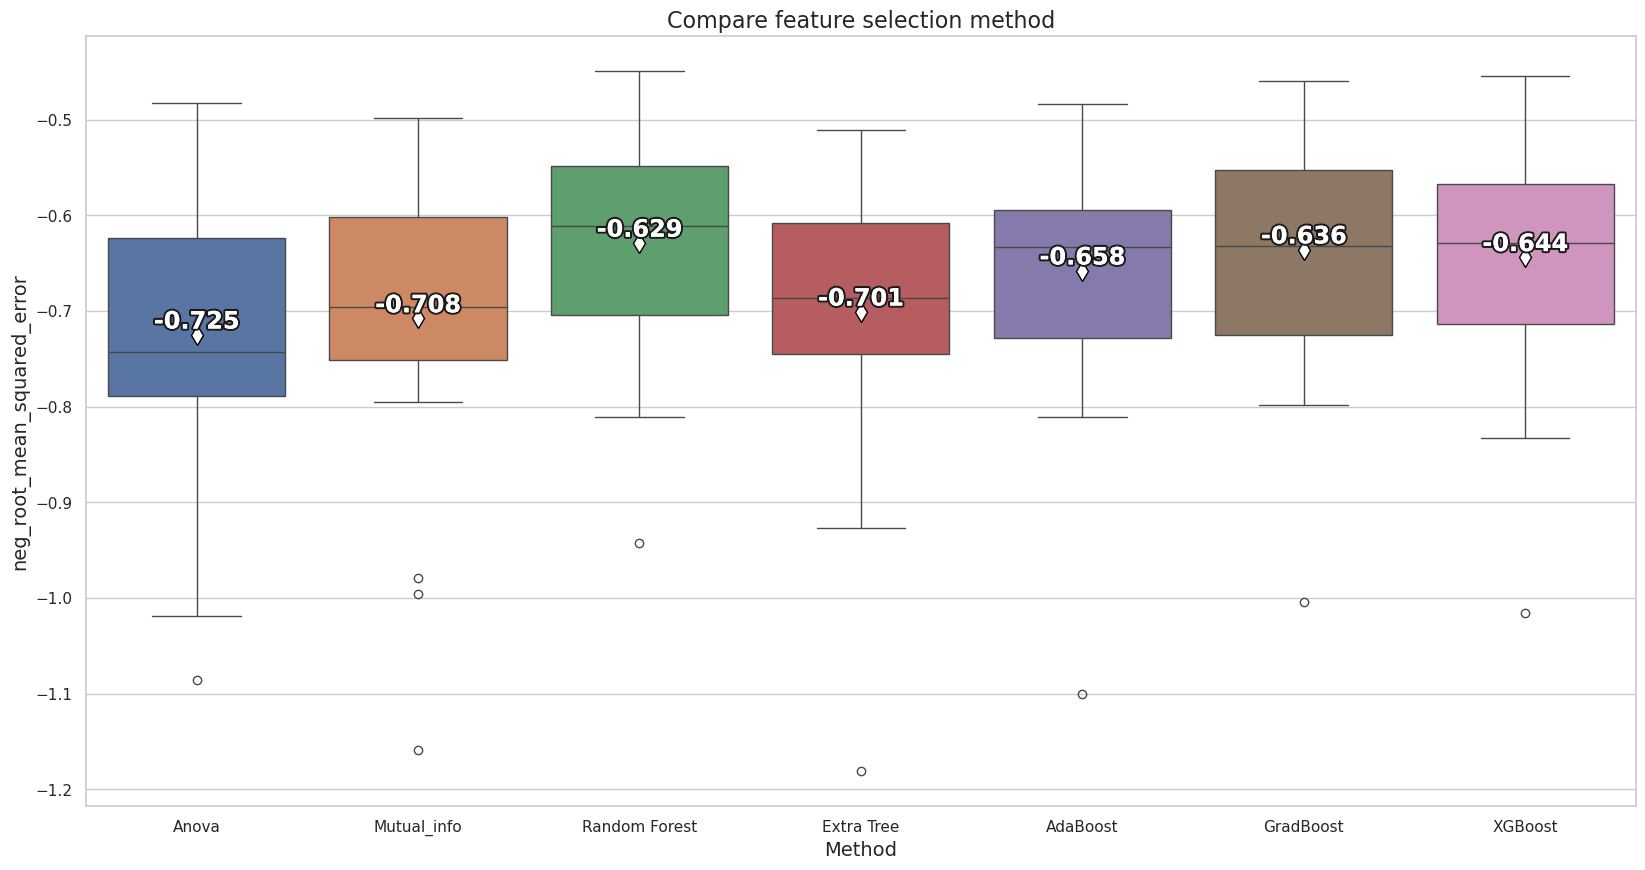

In [10]:
import warnings
warnings.filterwarnings('ignore')
scoring = 'neg_root_mean_squared_error'
Descriptor_select = feature_engineering(Data_train, Data_test, activity_col= activity_col, scoring=scoring, smiles_col=smiles_col,
                                       scale_y=scale_y)
Descriptor_select.case_model()
Descriptor_select.compare()

,model_1,model_2,t_stat,p_val,worse_prob,better_prob,rope_prob
0,Anova,Mutual_info,-0.334,1.000,0.557,0.303,0.140
1,Anova,Random Forest,-2.042,0.528,0.961,0.016,0.023
2,Anova,Extra Tree,-0.428,1.000,0.600,0.276,0.124
3,Anova,AdaBoost,-1.441,1.000,0.885,0.054,0.061
4,Anova,GradBoost,-1.907,0.698,0.949,0.021,0.029
5,Anova,XGBoost,-1.668,1.000,0.923,0.036,0.041
6,Mutual_info,Random Forest,-1.466,1.000,0.895,0.055,0.051
7,Mutual_info,Extra Tree,-0.139,1.000,0.477,0.369,0.154
8,Mutual_info,AdaBoost,-0.917,1.000,0.765,0.139,0.096
9,Mutual_info,GradBoost,-1.366,1.000,0.875,0.065,0.059


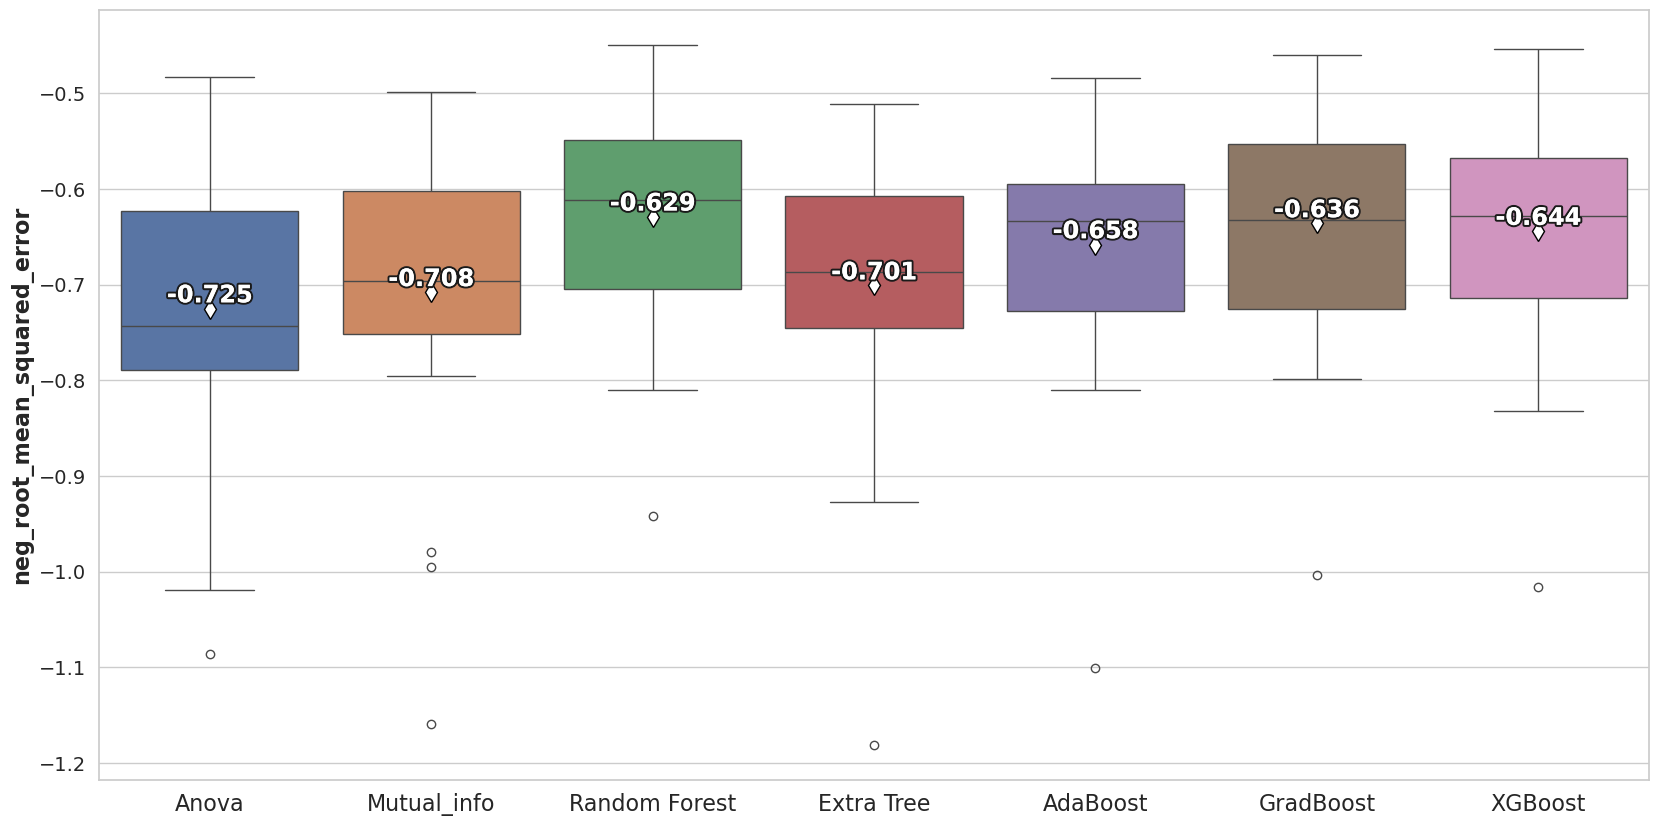

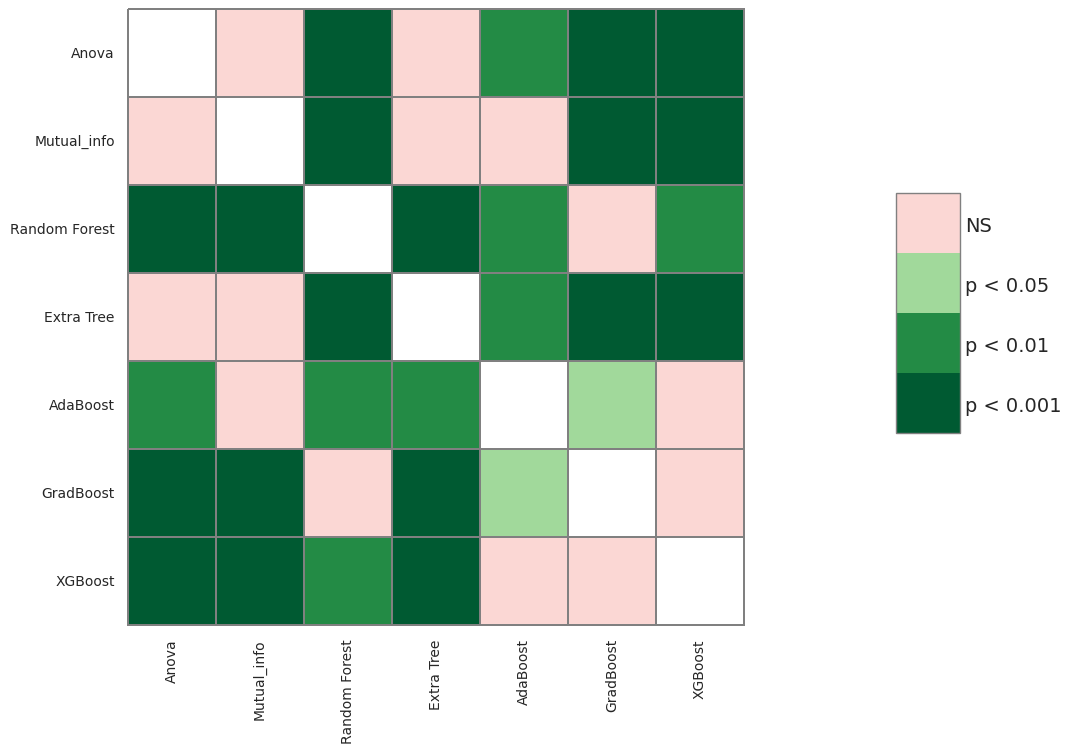

In [11]:
SAVE_PREFIX = './raw_data_features/'+RUN+'/feature_engineering/'+scoring+'/'
features_compare = statical_test(Descriptor_select.results,Descriptor_select.names, SAVE_PREFIX = SAVE_PREFIX, scoring=scoring,
                                 X_train = Descriptor_select.X_train,y_train = Descriptor_select.y_train)
features_compare.visualize()

## 4.3. MAE

Using Transformed Target Regressor
>Anova -0.376 ± 0.102 (-0.352)
>Mutual_info -0.352 ± 0.095 (-0.351)
>Random Forest -0.329 ± 0.082 (-0.317)
>Extra Tree -0.351 ± 0.097 (-0.331)
>AdaBoost -0.346 ± 0.092 (-0.328)
>GradBoost -0.331 ± 0.085 (-0.316)
>XGBoost -0.333 ± 0.084 (-0.320)


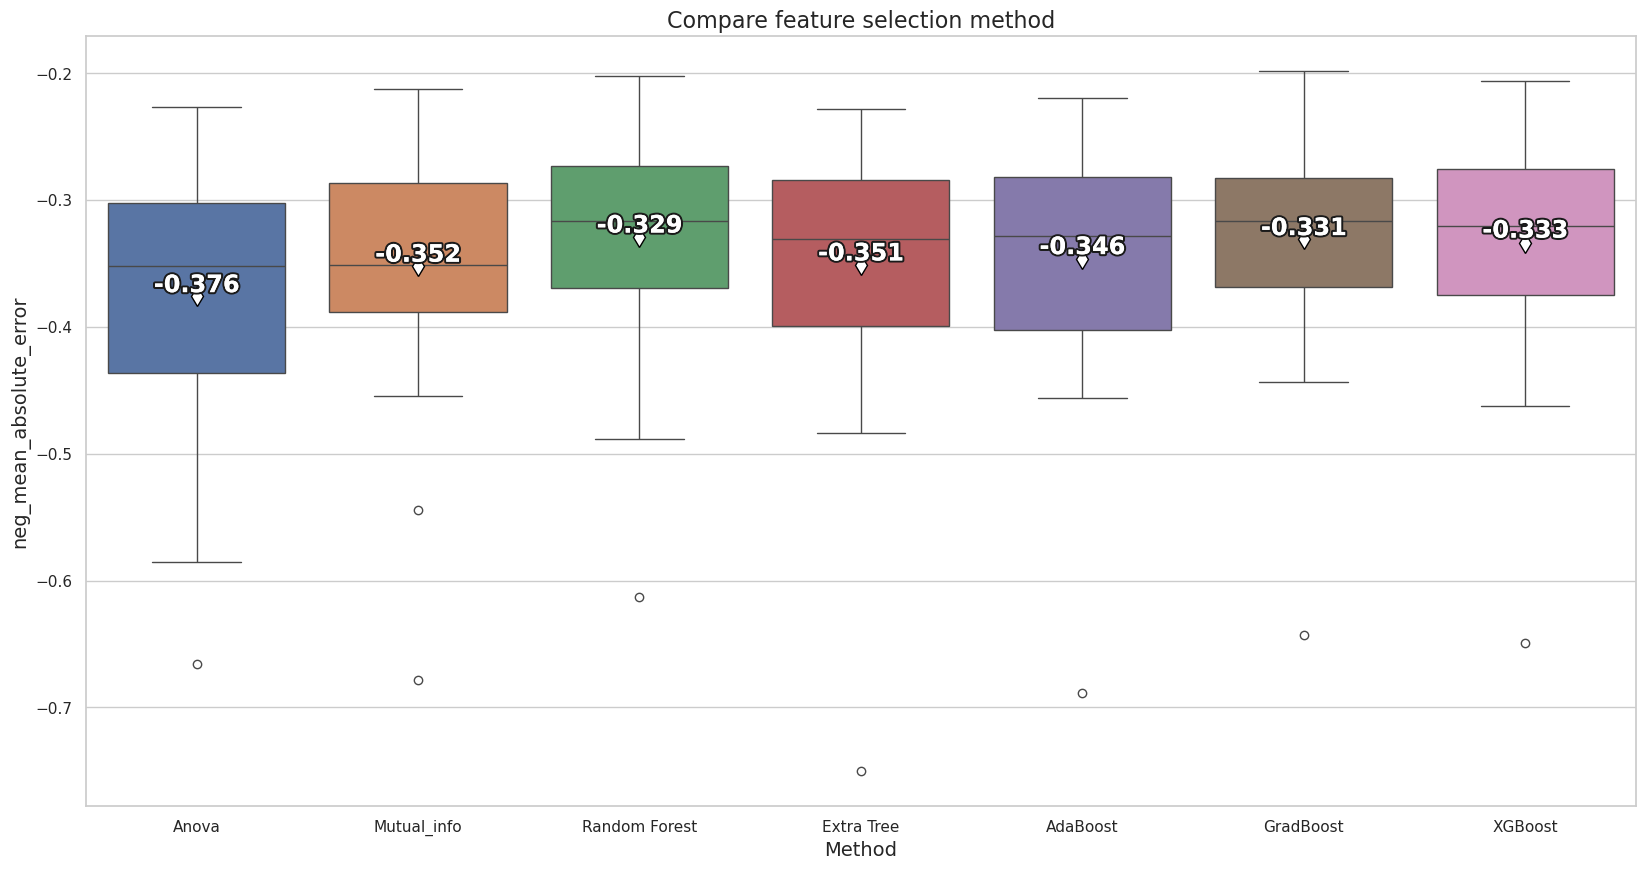

In [12]:
import warnings
warnings.filterwarnings('ignore')
scoring = 'neg_mean_absolute_error'
Descriptor_select = feature_engineering(Data_train, Data_test, activity_col= activity_col, scoring=scoring, smiles_col=smiles_col,
                                       scale_y = scale_y)
Descriptor_select.case_model()
Descriptor_select.compare()

,model_1,model_2,t_stat,p_val,worse_prob,better_prob,rope_prob
0,Anova,Mutual_info,-0.907,1.000,0.698,0.104,0.199
1,Anova,Random Forest,-1.815,0.839,0.918,0.018,0.064
2,Anova,Extra Tree,-0.705,1.000,0.661,0.165,0.174
3,Anova,AdaBoost,-1.203,1.000,0.785,0.059,0.156
4,Anova,GradBoost,-1.631,1.000,0.893,0.028,0.079
5,Anova,XGBoost,-1.512,1.000,0.871,0.036,0.093
6,Mutual_info,Random Forest,-0.991,1.000,0.712,0.084,0.205
7,Mutual_info,Extra Tree,-0.037,1.000,0.372,0.345,0.282
8,Mutual_info,AdaBoost,-0.257,1.000,0.436,0.252,0.311
9,Mutual_info,GradBoost,-0.953,1.000,0.695,0.087,0.218


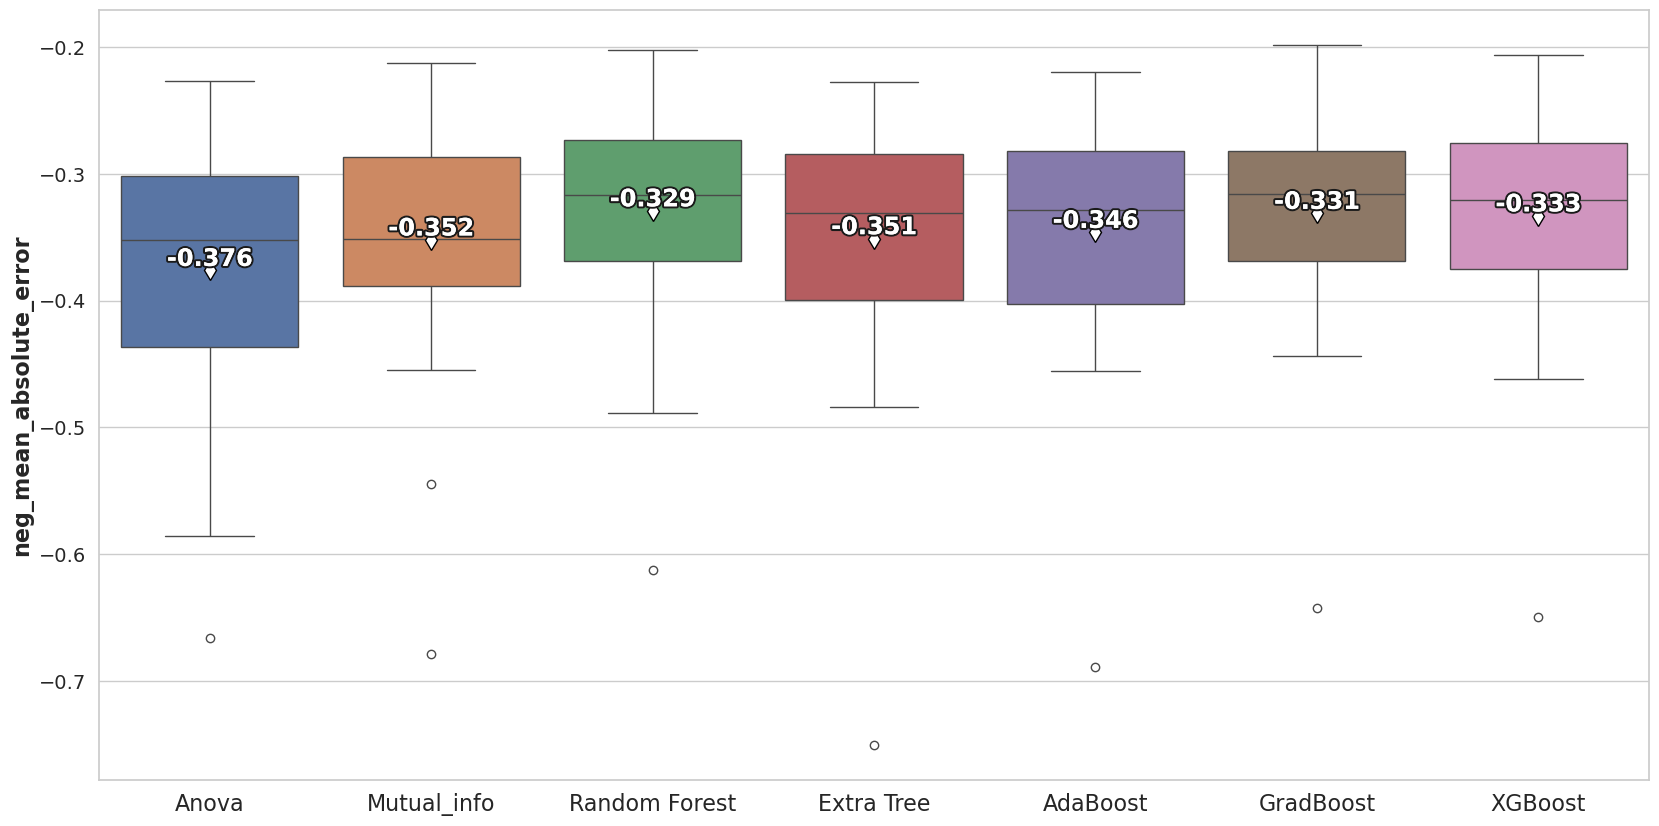

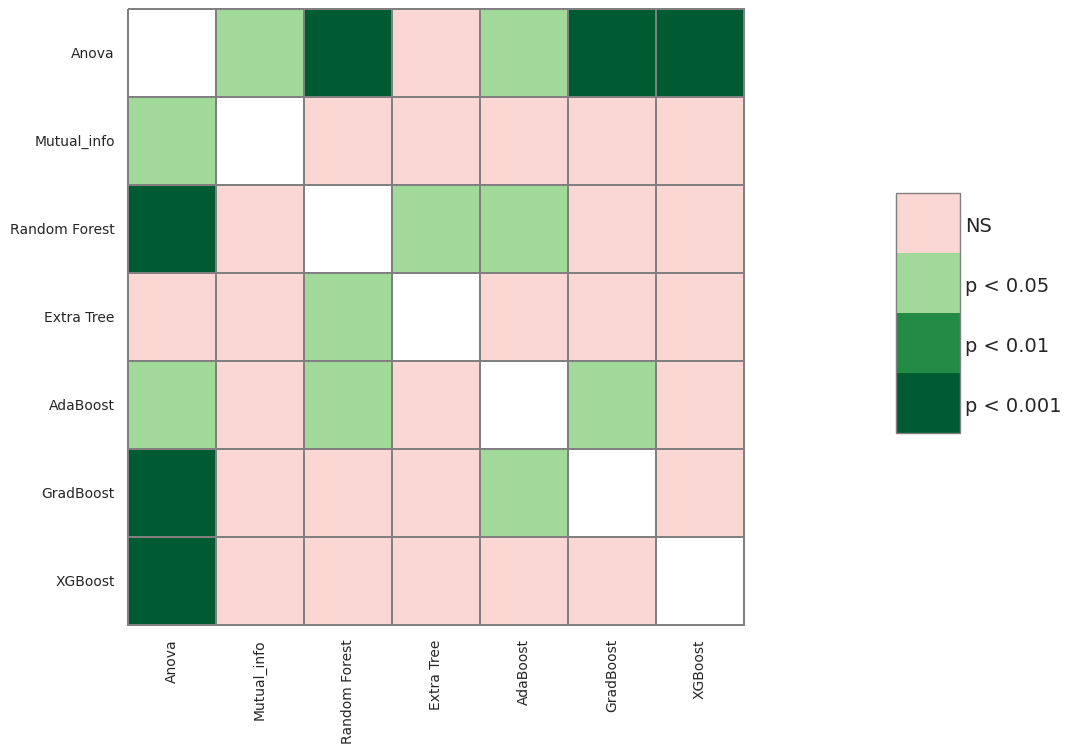

In [13]:
SAVE_PREFIX = './raw_data_features/'+RUN+'/feature_engineering/'+scoring+'/'
features_compare = statical_test(Descriptor_select.results,Descriptor_select.names, SAVE_PREFIX = SAVE_PREFIX, scoring=scoring,
                                 X_train = Descriptor_select.X_train,y_train = Descriptor_select.y_train)
features_compare.visualize()

## 4.4. Check number

In [14]:
methods = ['Anova','Mutual information','RF','ExT','Ada',
          'Grad','XGB']
for i in methods:
    feature = feature_selection_pipeline(data_train=Data_train, data_test=Data_test, smiles_col=smiles_col,
                                             activity_col=activity_col,task_type =task_type,
                                             scoring = scoring, method = i, scale_y=scale_y)
    feature.fit()
    print(i)
    print(feature.X_train_new.shape)
    print('****')

Using Transformed Target Regressor
Anova
(4110, 50)
****
Using Transformed Target Regressor
Mutual information
(4110, 50)
****
Using Transformed Target Regressor
RF
(4110, 510)
****
Using Transformed Target Regressor
ExT
(4110, 191)
****
Using Transformed Target Regressor
Ada
(4110, 210)
****
Using Transformed Target Regressor
Grad
(4110, 298)
****
Using Transformed Target Regressor
XGB
(4110, 330)
****


## 4.5. Feature Selected

In [15]:
# 6. Feature engineering
feature = feature_selection_pipeline(data_train=Data_train, data_test=Data_test, smiles_col = smiles_col,
                                             activity_col=activity_col,task_type =task_type,
                                             scoring = scoring, method ='Grad', scale_y=scale_y)
feature.fit()
X_train = feature.X_train_new
X_test  = feature.X_test_new
y_train = feature.y_train
y_test  = feature.y_test
smiles_train = feature.smiles_train
smiles_test = feature.smiles_test
print(X_train.shape)
print(X_test.shape)
print(len(smiles_train))
print(len(smiles_test))

Using Transformed Target Regressor
(4110, 298)
(655, 298)
4110
655


In [16]:
feature.save_pipeline(SAVE_FITTED_PIPELINE)

# **5. Model Selection**

In [17]:
X_train = np.load(SAVE_FITTED_PIPELINE + '/X_train.npy')
X_test  = np.load(SAVE_FITTED_PIPELINE + '/X_test.npy')
y_train = pd.read_csv(SAVE_FITTED_PIPELINE + '/y_train.csv').iloc[:,0]
y_test  = pd.read_csv(SAVE_FITTED_PIPELINE + '/y_test.csv').iloc[:,0]
smiles_train = np.load(SAVE_FITTED_PIPELINE + '/smiles_train.npy')
smiles_test = np.load(SAVE_FITTED_PIPELINE + '/smiles_test.npy')
with open(SAVE_FITTED_PIPELINE + '/rescale_y.pkl', 'rb') as f:
    scale_y = pickle.load(f)

Using Transformed Target Regressor
>Ridge 0.692 ± 0.092 (0.712)
>ELN 0.697 ± 0.093 (0.719)
>Huber 0.676 ± 0.115 (0.719)
>PCR 0.454 ± 0.144 (0.474)
>PLS 0.694 ± 0.098 (0.718)
>GPR 0.690 ± 0.092 (0.710)
>KNN 0.738 ± 0.107 (0.750)
>SVM 0.629 ± 0.081 (0.641)
>RF 0.767 ± 0.082 (0.785)
>ExT 0.560 ± 0.155 (0.572)
>ADA 0.205 ± 0.159 (0.235)
>Grad 0.748 ± 0.084 (0.759)
>XGB 0.758 ± 0.072 (0.765)
>CatB 0.792 ± 0.075 (0.807)
>Hist 0.776 ± 0.080 (0.800)


,model_1,model_2,t_stat,p_val,worse_prob,better_prob,rope_prob
0,Ridge,ELN,-2.137,1.000,0.018,0.000,0.982
1,Ridge,Huber,0.602,1.000,0.167,0.588,0.245
2,Ridge,PCR,4.523,0.005,0.000,1.000,0.000
3,Ridge,PLS,-0.211,1.000,0.238,0.131,0.630
4,Ridge,GPR,2.483,1.000,0.000,0.000,1.000
...,...,...,...,...,...,...,...
100,Grad,CatB,-2.225,1.000,0.952,0.005,0.043
101,Grad,Hist,-1.795,1.000,0.871,0.011,0.119
102,XGB,CatB,-2.505,0.950,0.957,0.002,0.042
103,XGB,Hist,-1.143,1.000,0.697,0.044,0.259


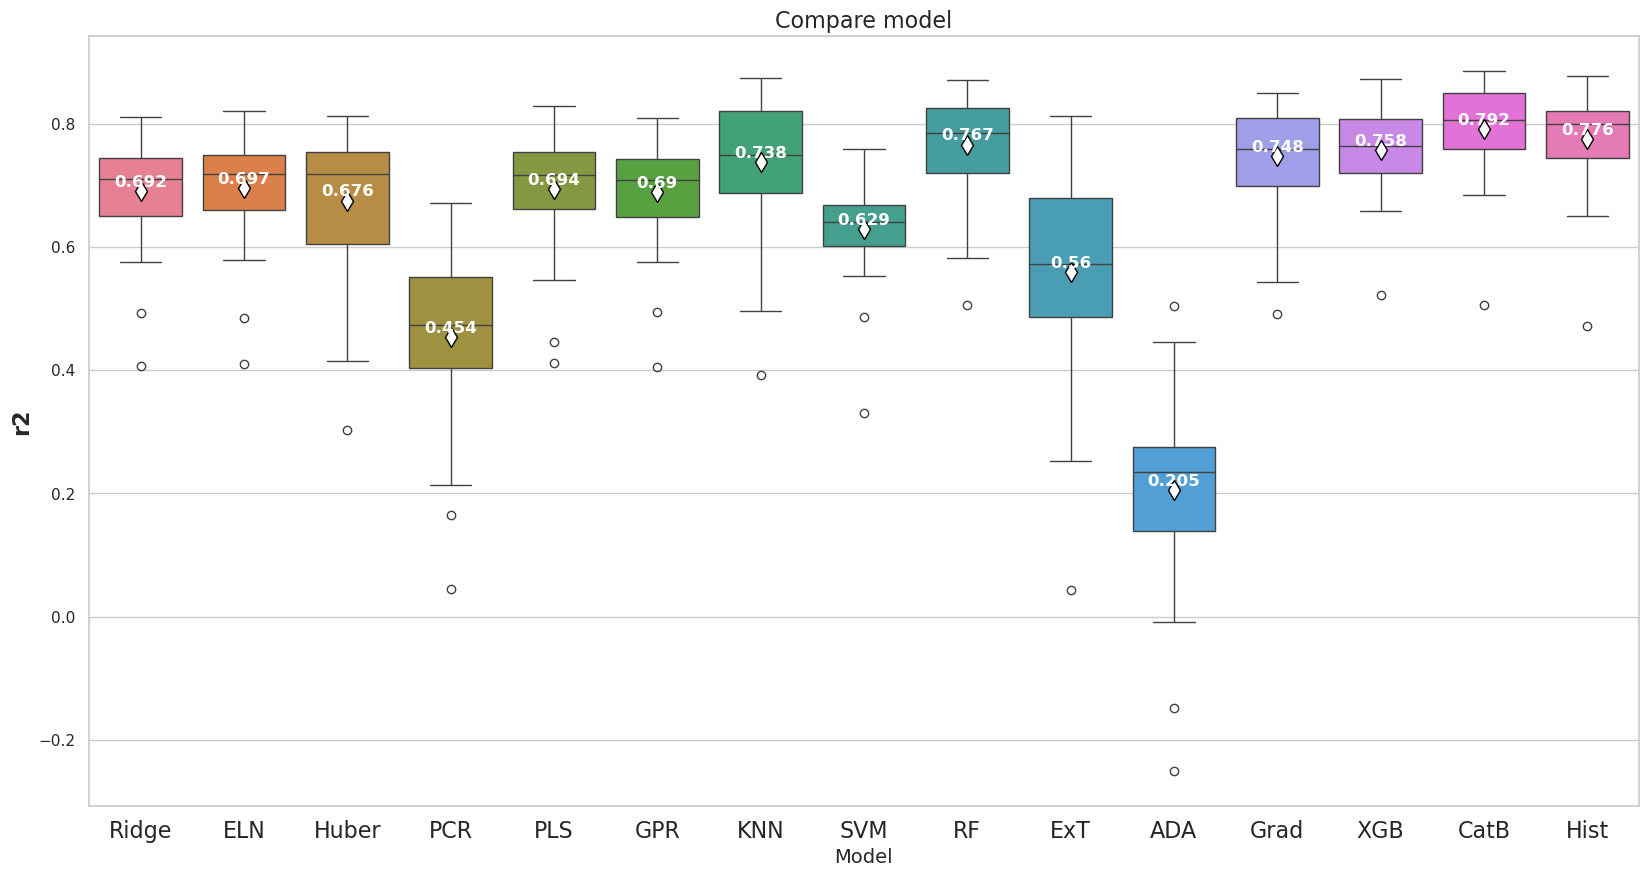

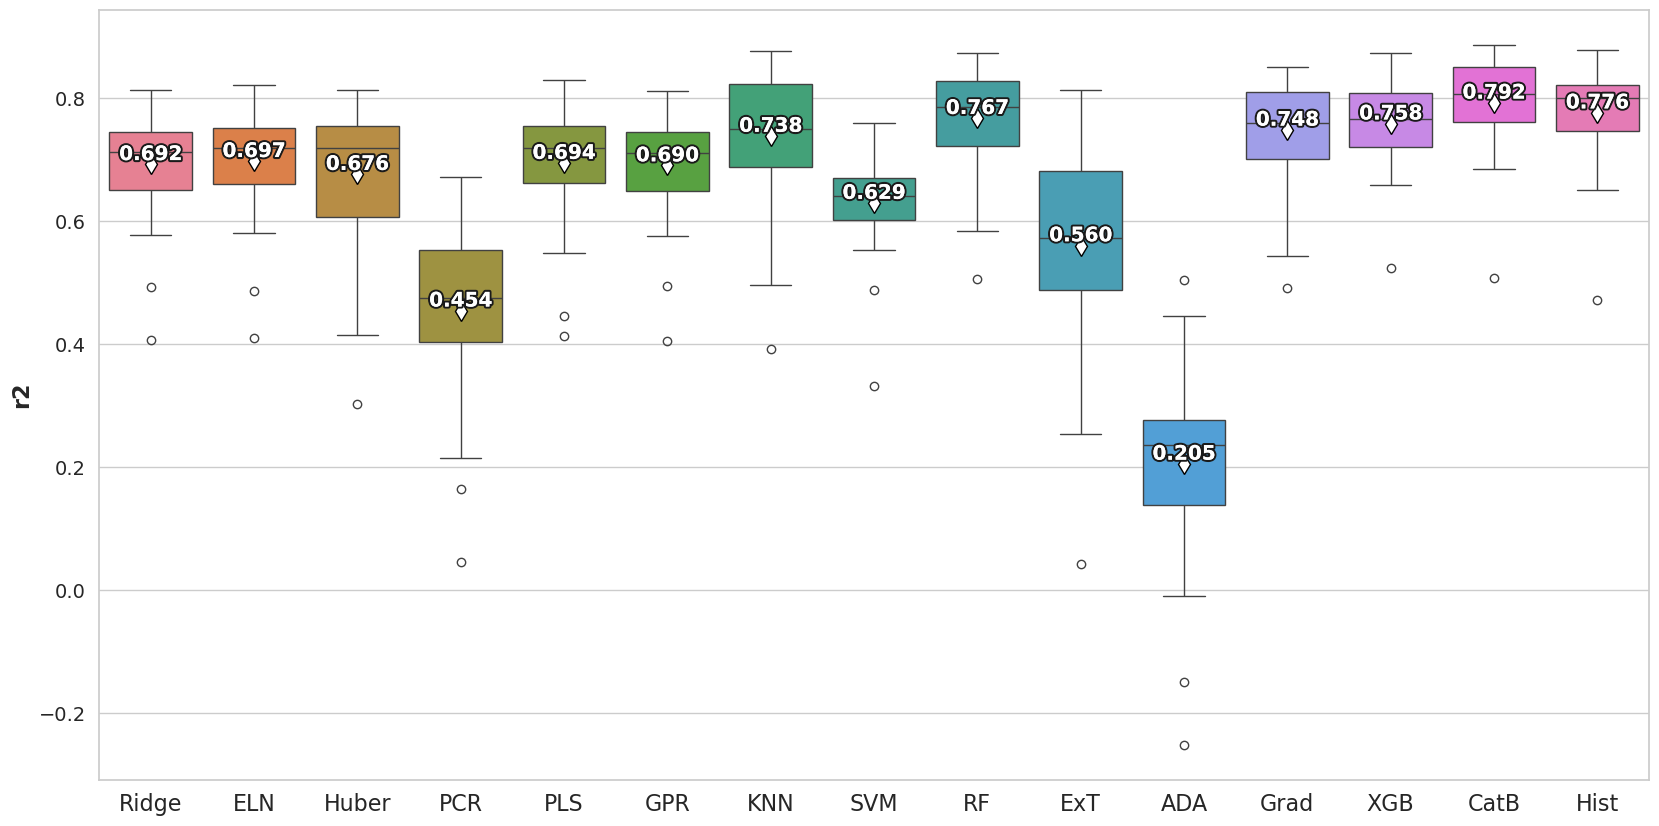

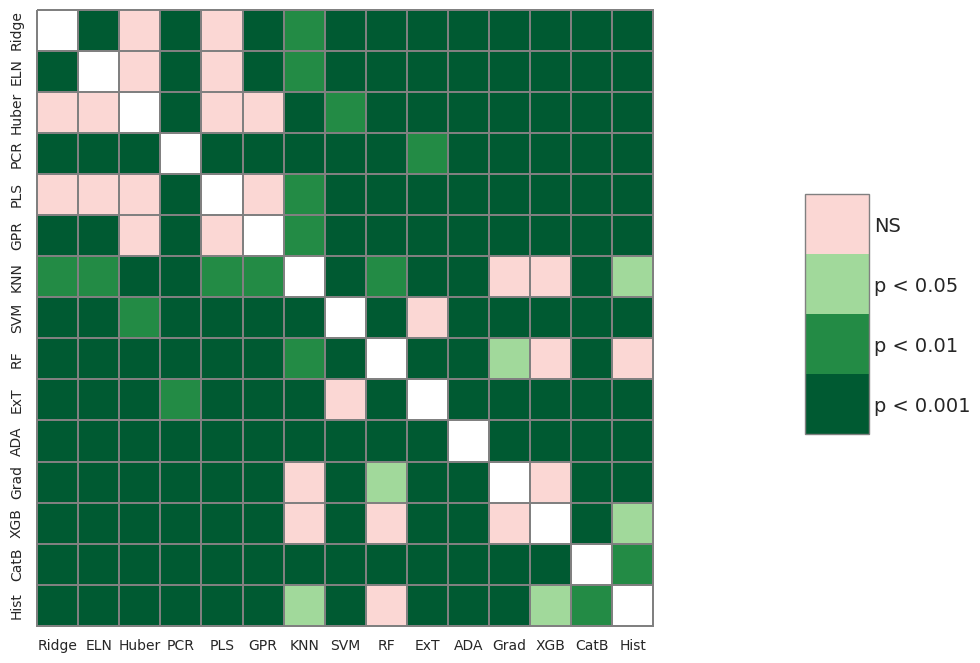

In [18]:
SCORING = 'r2'
SAVE_PREFIX='./raw_data_features/'+RUN+'/model_selection/'+SCORING+'/'

model = model_selection(X_train, y_train, SAVE_PREFIX=SAVE_PREFIX, smiles_list=smiles_train,
                           data_name='RDK7', task_type =task_type,scoring = SCORING, scale_y=scale_y)
model.compare()
model.visualize()

features_compare = statical_test(model.results, model.names, SAVE_PREFIX = SAVE_PREFIX, scoring = SCORING,
                                 X_train = model.X_train,y_train = model.y_train)
features_compare.visualize(box_text_size='large')

Using Transformed Target Regressor
>Ridge -0.695 ± 0.111 (-0.682)
>ELN -0.689 ± 0.114 (-0.674)
>Huber -0.712 ± 0.145 (-0.692)
>PCR -0.928 ± 0.141 (-0.920)
>PLS -0.692 ± 0.121 (-0.666)
>GPR -0.696 ± 0.110 (-0.683)
>KNN -0.638 ± 0.149 (-0.623)
>SVM -0.763 ± 0.073 (-0.758)
>RF -0.603 ± 0.112 (-0.584)
>ExT -0.829 ± 0.173 (-0.810)
>ADA -1.117 ± 0.072 (-1.095)
>Grad -0.628 ± 0.119 (-0.621)
>XGB -0.616 ± 0.098 (-0.610)
>CatB -0.569 ± 0.099 (-0.558)
>Hist -0.591 ± 0.104 (-0.577)


,model_1,model_2,t_stat,p_val,worse_prob,better_prob,rope_prob
0,Ridge,ELN,-2.126,1.000,0.063,0.000,0.937
1,Ridge,Huber,0.616,1.000,0.170,0.602,0.228
2,Ridge,PCR,5.058,0.001,0.000,1.000,0.000
3,Ridge,PLS,-0.250,1.000,0.282,0.144,0.575
4,Ridge,GPR,2.661,0.660,0.000,0.000,1.000
...,...,...,...,...,...,...,...
100,Grad,CatB,-2.283,1.000,0.966,0.006,0.027
101,Grad,Hist,-1.917,1.000,0.915,0.011,0.074
102,XGB,CatB,-2.506,0.950,0.971,0.003,0.026
103,XGB,Hist,-1.273,1.000,0.777,0.043,0.180


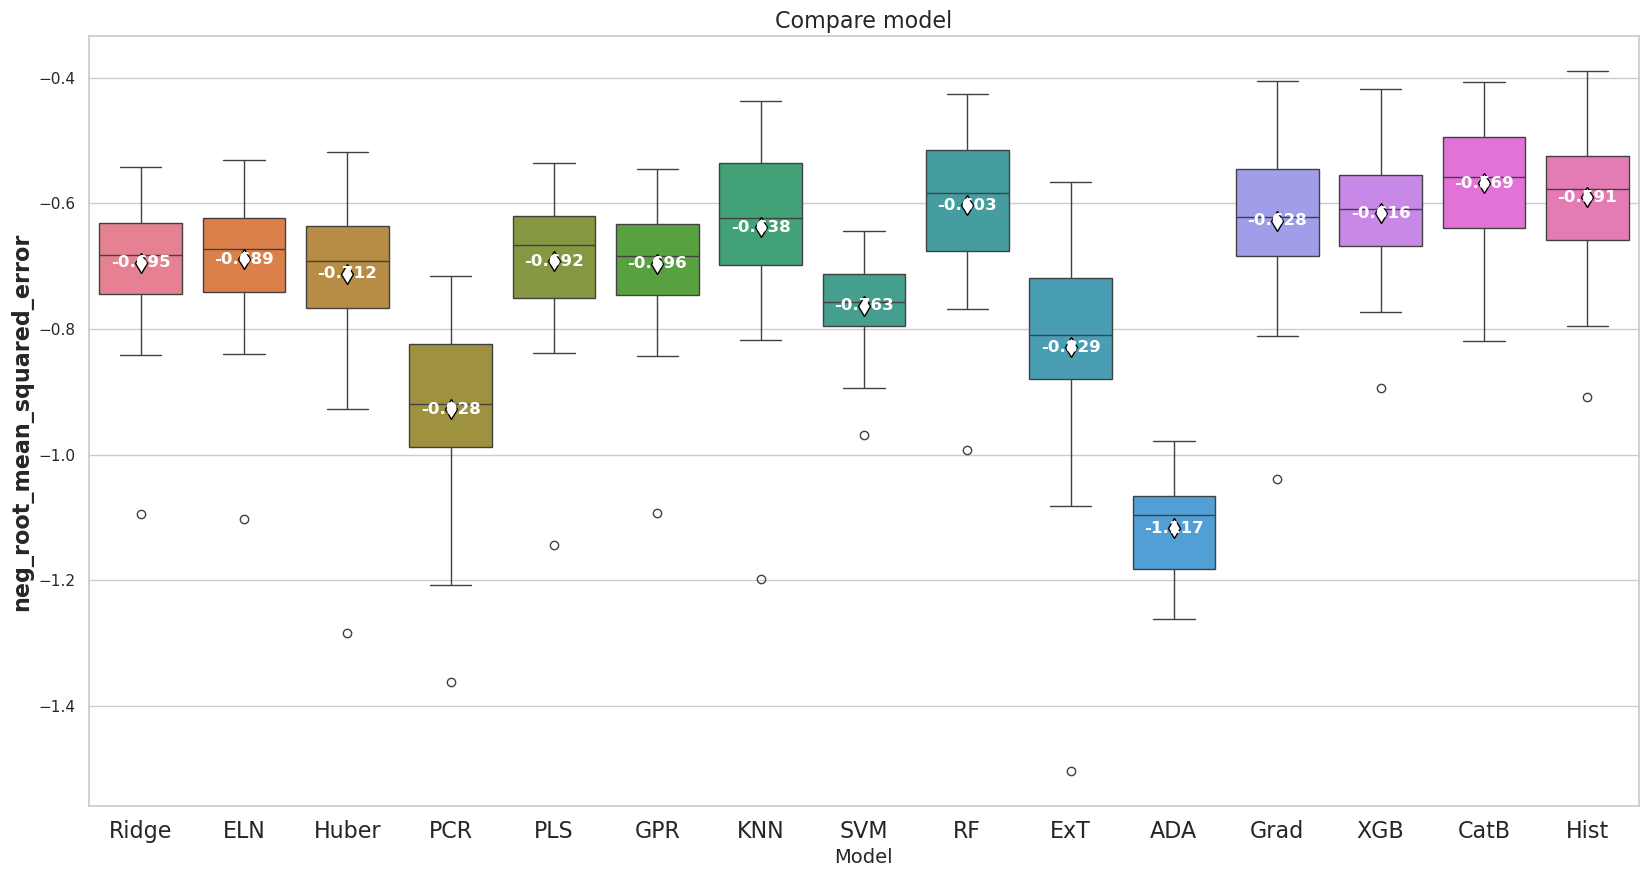

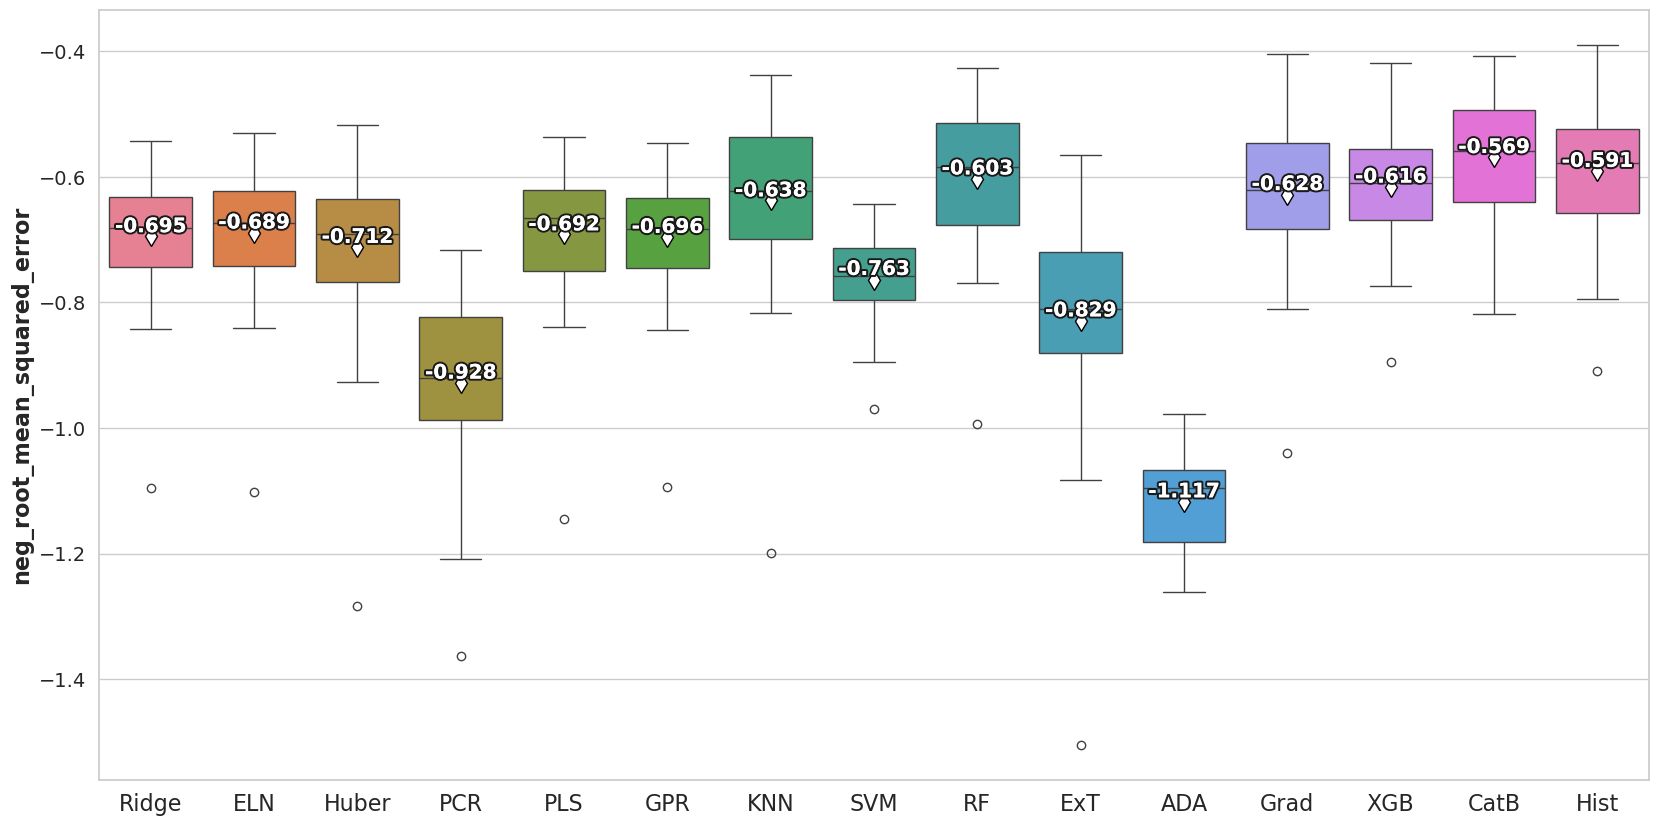

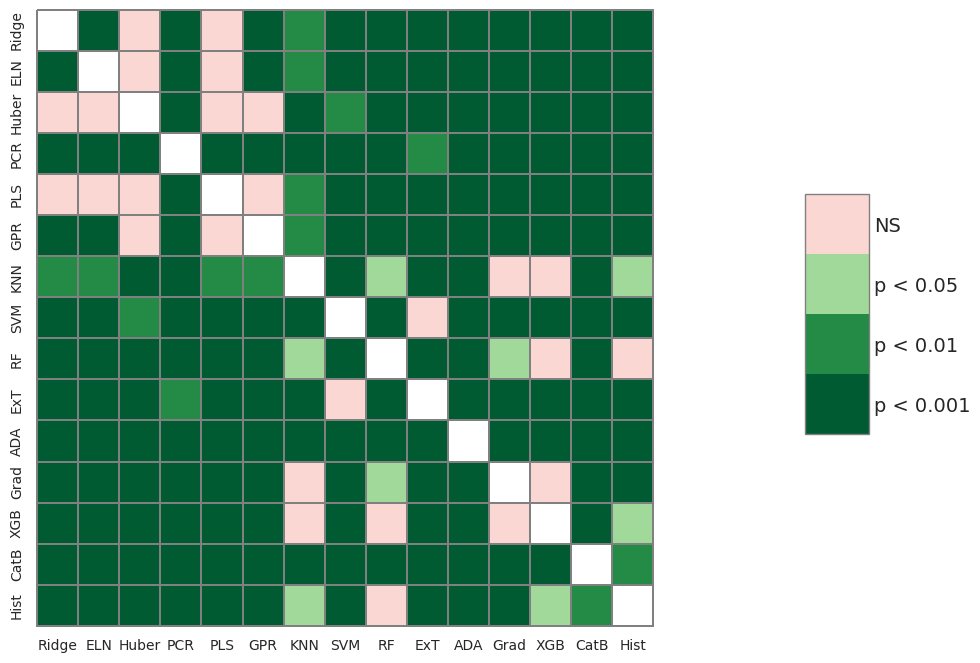

In [19]:
SCORING = 'neg_root_mean_squared_error'
SAVE_PREFIX='./raw_data_features/'+RUN+'/model_selection/'+SCORING+'/'

model = model_selection(X_train, y_train, SAVE_PREFIX=SAVE_PREFIX, smiles_list=smiles_train,
                           data_name='RDK7', task_type =task_type,scoring = SCORING, scale_y=scale_y)
model.compare()
model.visualize()

features_compare = statical_test(model.results, model.names, SAVE_PREFIX = SAVE_PREFIX, scoring = SCORING,
                                 X_train = model.X_train,y_train = model.y_train)
features_compare.visualize(box_text_size='large')

Using Transformed Target Regressor
>Ridge -0.477 ± 0.074 (-0.468)
>ELN -0.470 ± 0.076 (-0.460)
>Huber -0.433 ± 0.088 (-0.430)
>PCR -0.650 ± 0.107 (-0.654)
>PLS -0.472 ± 0.077 (-0.462)
>GPR -0.478 ± 0.074 (-0.470)
>KNN -0.287 ± 0.108 (-0.271)
>SVM -0.653 ± 0.058 (-0.651)
>RF -0.312 ± 0.082 (-0.301)
>ExT -0.369 ± 0.120 (-0.338)
>ADA -0.997 ± 0.080 (-0.986)
>Grad -0.369 ± 0.085 (-0.362)
>XGB -0.332 ± 0.070 (-0.308)
>CatB -0.307 ± 0.068 (-0.299)
>Hist -0.322 ± 0.075 (-0.302)


,model_1,model_2,t_stat,p_val,worse_prob,better_prob,rope_prob
0,Ridge,ELN,-3.115,0.216,0.056,0.000,0.944
1,Ridge,Huber,-2.746,0.539,0.978,0.001,0.021
2,Ridge,PCR,3.845,0.032,0.000,0.999,0.000
3,Ridge,PLS,-0.513,1.000,0.258,0.052,0.690
4,Ridge,GPR,3.652,0.054,0.000,0.000,1.000
...,...,...,...,...,...,...,...
100,Grad,CatB,-3.859,0.031,0.998,0.000,0.001
101,Grad,Hist,-3.512,0.078,0.995,0.000,0.005
102,XGB,CatB,-2.614,0.738,0.936,0.001,0.063
103,XGB,Hist,-1.016,1.000,0.520,0.028,0.452


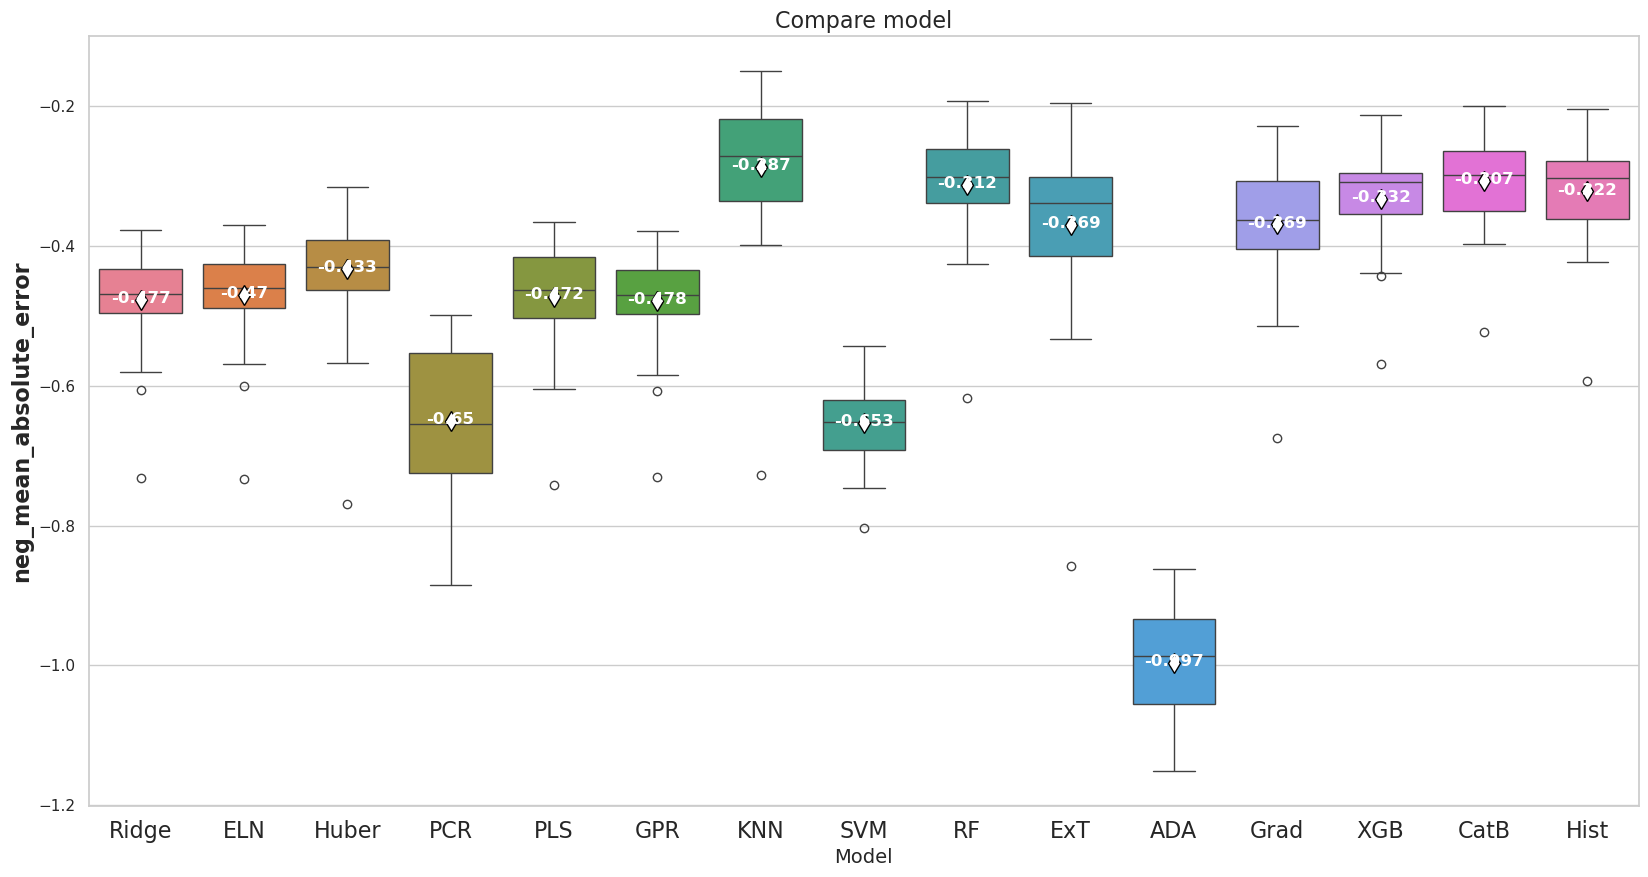

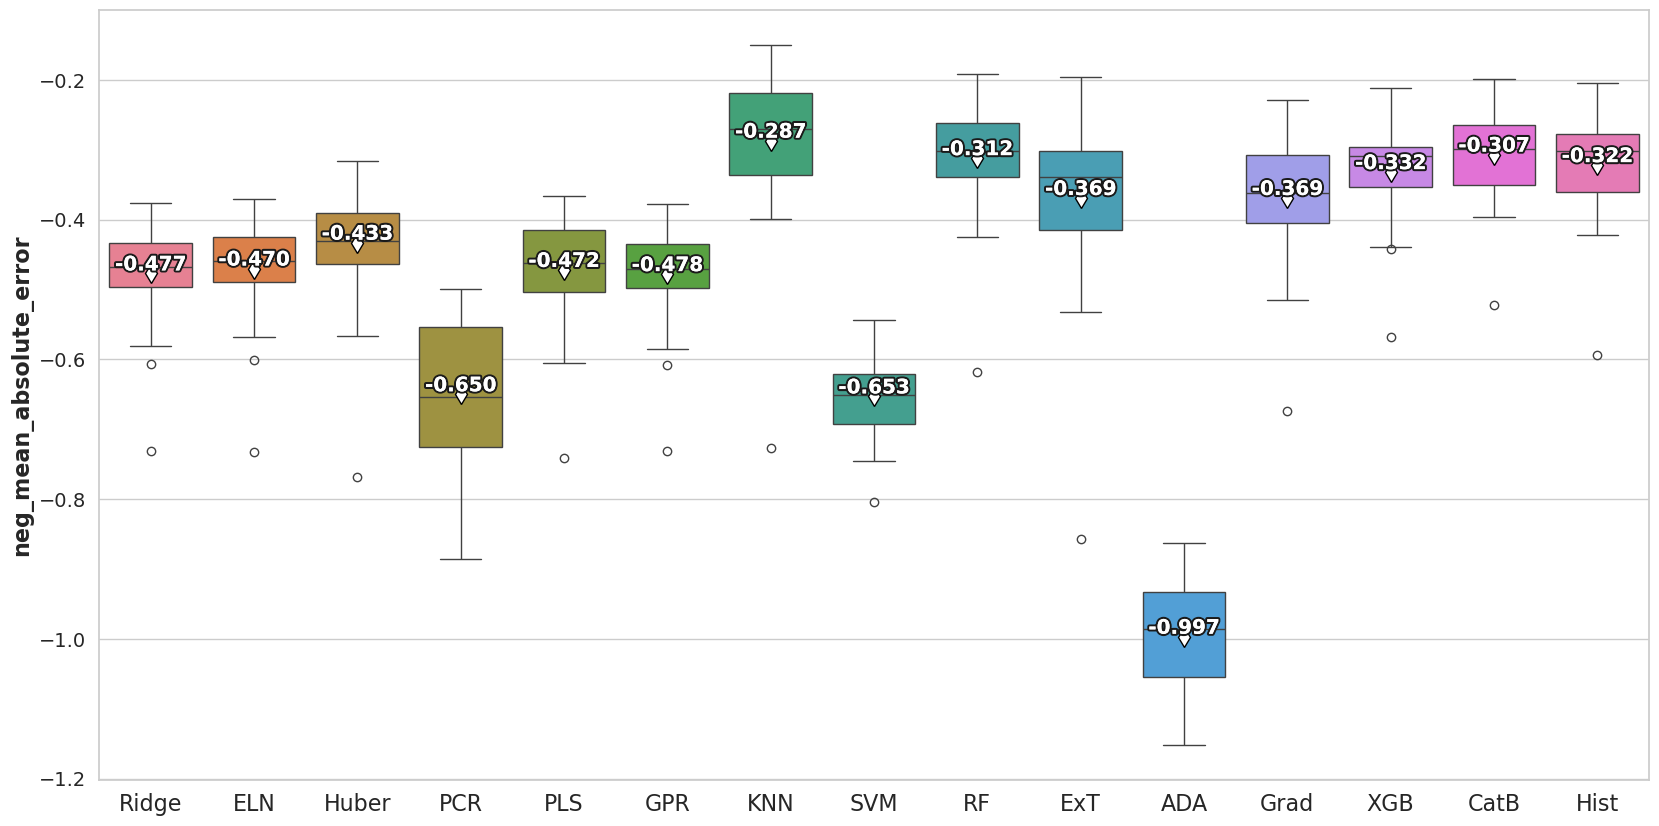

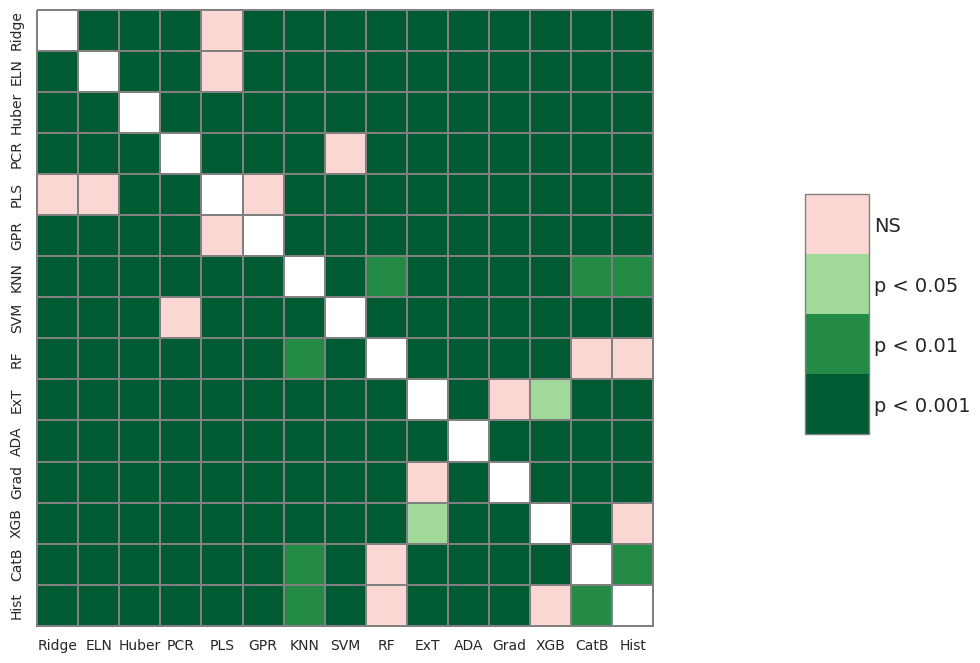

In [20]:
SCORING = 'neg_mean_absolute_error'
SAVE_PREFIX='./raw_data_features/'+RUN+'/model_selection/'+SCORING+'/'

model = model_selection(X_train, y_train, SAVE_PREFIX=SAVE_PREFIX, smiles_list=smiles_train,
                           data_name='RDK7', task_type =task_type,scoring = SCORING, scale_y=scale_y)
model.compare()
model.visualize()

features_compare = statical_test(model.results, model.names, SAVE_PREFIX = SAVE_PREFIX, scoring = SCORING,
                                 X_train = model.X_train,y_train = model.y_train)
features_compare.visualize(box_text_size='large')

# **6. External Validation**

## 6.1. Evaluate model

In [21]:
X_train = np.load(SAVE_FITTED_PIPELINE + '/X_train.npy')
X_test  = np.load(SAVE_FITTED_PIPELINE + '/X_test.npy')
y_train = pd.read_csv(SAVE_FITTED_PIPELINE + '/y_train.csv').iloc[:,0]
y_test  = pd.read_csv(SAVE_FITTED_PIPELINE + '/y_test.csv').iloc[:,0]
smiles_train = np.load(SAVE_FITTED_PIPELINE + '/smiles_train.npy')
smiles_test = np.load(SAVE_FITTED_PIPELINE + '/smiles_test.npy')
with open(SAVE_FITTED_PIPELINE + '/rescale_y.pkl', 'rb') as f:
    scale_y = pickle.load(f)

In [22]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_validate, RepeatedKFold
from catboost import CatBoostRegressor
from sklearn.compose import TransformedTargetRegressor
from Scaffold_split import RepeatedStratifiedScaffoldKFold, get_scaffold_groups

model = CatBoostRegressor(verbose = 0, random_state = 42)
# model.fit(X_train, y_train)
trans_model = TransformedTargetRegressor(regressor = model, transformer = scale_y)
trans_model.fit(X_train, y_train)

scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']
groups = get_scaffold_groups(smiles_train)
cv= RepeatedStratifiedScaffoldKFold(n_splits=10,n_repeats=3,random_state=42,scaff_based='median')
scores = cross_validate(trans_model, X_train, y_train, groups=groups, cv=cv, scoring=scoring, n_jobs = -1)

print("R2 cross validation %.3f ± %.3f" % (scores['test_r2'].mean(),scores['test_r2'].std()))
print("RMSE cross validation: %.3f ± %.3f" % (-scores['test_neg_root_mean_squared_error'].mean(),scores['test_neg_root_mean_squared_error'].std()))
print("MAE cross validation: %.3f ± %.3f" % (-scores['test_neg_mean_absolute_error'].mean(),scores['test_neg_mean_absolute_error'].std()))

y_pred_test = trans_model.predict(X_test)

print('*** External Validation ***')
print("R2 = ",r2_score(y_test,y_pred_test))
print("RMSE = ",mean_squared_error(y_test,y_pred_test,squared=False))
print("MAE = ",mean_absolute_error(y_test,y_pred_test))

R2 cross validation 0.792 ± 0.075
RMSE cross validation: 0.569 ± 0.099
MAE cross validation: 0.307 ± 0.068
*** External Validation ***
R2 =  0.8592851873534305
RMSE =  0.5046151139908822
MAE =  0.26998141971502143


In [23]:
with open(SAVE_FITTED_PIPELINE + '/model.pkl','wb') as f:
    pickle.dump(trans_model,f)
with open(SAVE_FITTED_PIPELINE + '/baseline_cv_scores.pkl','wb') as f:
    pickle.dump(scores,f)

## 6.2. Test prediction

In [24]:
from Prediction import predict
df = pd.read_csv('data/VEGFR2_drug_smiles.csv')
df

,ID,SMILES
0,Sorafenib,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...
1,Pazopanib,Cc1ccc(Nc2nccc(N(C)c3ccc4c(C)n(C)nc4c3)n2)cc1S...
2,Sunitinib,CCN(CC)CCNC(=O)c1c(C)[nH]c(C=C2C(=O)Nc3ccc(F)c...
3,Cabozantinib,COc1cc2nccc(Oc3ccc(NC(=O)C4(C(=O)Nc5ccc(F)cc5)...
4,Axitinib,CNC(=O)c1ccccc1Sc1ccc2c(C=Cc3ccccn3)n[nH]c2c1
5,Lenvatinib,COc1cc2nccc(Oc3ccc(NC(=O)NC4CC4)c(Cl)c3)c2cc1C...
6,Regorafenib,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...
7,Vandetanib,COc1cc2c(Nc3ccc(Br)cc3F)ncnc2cc1OCC1CCN(C)CC1
8,Tivozanib,COc1cc2nccc(Oc3ccc(NC(=O)Nc4cc(C)on4)c(Cl)c3)c...


In [25]:
from rdkit import Chem
from rdkit import Chem, DataStructs
import numpy as np
df['Molecule'] = df['SMILES'].apply(Chem.MolFromSmiles)
def RDKFp(mol, maxPath=7, fpSize=4096, nBitsPerHash=2):
        fp = Chem.RDKFingerprint(mol, maxPath=maxPath, fpSize=fpSize, nBitsPerHash=nBitsPerHash)
        ar = np.zeros((1,), dtype=np.int8)
        DataStructs.ConvertToNumpyArray(fp, ar)
        return ar
X = np.stack(df['Molecule'].apply(RDKFp).values)
data_X = pd.concat([df['ID'],pd.DataFrame(X)], axis = 1)
data_X.head(5)

,ID,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,Sorafenib,1,0,0,0,0,1,0,0,0,...,0,1,0,1,0,1,0,0,0,0
1,Pazopanib,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,1
2,Sunitinib,0,1,0,1,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
3,Cabozantinib,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Axitinib,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,1


In [26]:
pred = predict(materials_path = SAVE_FITTED_PIPELINE,
               data = data_X,
              ID = 'ID')
Report = pred.predict()

--- PREDICTION ---
Preparing data...
 ⊢ Drop ID...
 ⊢ Check NaN...
 ⊢ Drop duplicated columns...
 ⊢ Missing value cleaning...
 ⊢ Applying variance_threshold...
 ⊢ Nomial columns...
 ⊢ Rescaling...
Feature selection...
Predicting...
Done!


In [27]:
Report

,ID,Predict
0,Sorafenib,6.379010
1,Pazopanib,6.063261
2,Sunitinib,6.842947
3,Cabozantinib,7.950878
4,Axitinib,9.444969
5,Lenvatinib,8.344777
6,Regorafenib,6.926160
7,Vandetanib,7.449510
8,Tivozanib,8.074280
